In [1]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=277696d83cb5402bb3cf97405125349352baecc3648f4e5cc84f080c2700e365
  Stored in directory: /tmp/pip-ephem-wheel-cache-2odmp03x/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [2]:
!pip install spacy

In [4]:
import spacy

In [5]:
import en_core_web_lg
nlp = en_core_web_lg.load()

In [6]:
x = 'king man woman'
doc = nlp(x)

for token1 in doc:
  for token2 in doc:
    print(token1.text, token2.text, token1.similarity(token2))

king king 1.0
king man 0.4088461
king woman 0.26556593
man king 0.4088461
man man 1.0
man woman 0.7401745
woman king 0.26556593
woman man 0.7401745
woman woman 1.0


In [7]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/moviereviews.tsv', sep = '\t')

Downloading from the laximerit github repo

In [9]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [10]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-h51l_95x
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-h51l_95x
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.0-cp36-none-any.whl size=11716 sha256=0001298f950ddc405c20ae2c76007071e57d6bef01b0057891d720a13ff11bd1
  Stored in directory: /tmp/pip-ephem-wheel-cache-qdtfuqr6/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie


In [11]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [12]:
import preprocess_kgptalkie as ps
import re

In [15]:
x = 'Thank you @ venkat'
get_clean(x)

'thank yoyou venkat'

In [16]:
df['review'] = df['review'].apply(lambda x: get_clean(x))

In [17]:
df.head()

,label,review
0,neg,how do filmiss like moyouse hyount get into th...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for ayoust...
3,pos,according to hollywood movthat iss made in las...
4,neg,my first press screening of 1998 and already i...


In [18]:
x = 'cat dog'
doc = nlp(x)

In [19]:
doc.vector.shape

(300,)

In [23]:
doc[0]

cat

In [24]:
doc[0].vector # vector for cat

array([-0.15067  , -0.024468 , -0.23368  , -0.23378  , -0.18382  ,
        0.32711  , -0.22084  , -0.28777  ,  0.12759  ,  1.1656   ,
       -0.64163  , -0.098455 , -0.62397  ,  0.010431 , -0.25653  ,
        0.31799  ,  0.037779 ,  1.1904   , -0.17714  , -0.2595   ,
       -0.31461  ,  0.038825 , -0.15713  , -0.13484  ,  0.36936  ,
       -0.30562  , -0.40619  , -0.38965  ,  0.3686   ,  0.013963 ,
       -0.6895   ,  0.004066 , -0.1367   ,  0.32564  ,  0.24688  ,
       -0.14011  ,  0.53889  , -0.80441  , -0.1777   , -0.12922  ,
        0.16303  ,  0.14917  , -0.068429 , -0.33922  ,  0.18495  ,
       -0.082544 , -0.46892  ,  0.39581  , -0.13742  , -0.35132  ,
        0.22223  , -0.144    , -0.048287 ,  0.3379   , -0.31916  ,
        0.20526  ,  0.098624 , -0.23877  ,  0.045338 ,  0.43941  ,
        0.030385 , -0.013821 , -0.093273 , -0.18178  ,  0.19438  ,
       -0.3782   ,  0.70144  ,  0.16236  ,  0.0059111,  0.024898 ,
       -0.13613  , -0.11425  , -0.31598  , -0.14209  ,  0.0281

In [21]:
def get_vec(x):
  doc = nlp(x)
  vec = doc.vector
  return vec

In [22]:
get_vec(x)

array([-2.76215017e-01,  1.73051000e-01, -1.06199495e-01, -2.87514985e-01,
       -6.71409965e-02,  3.10755014e-01, -1.97300002e-01, -2.83794999e-01,
        9.76060033e-02,  1.66744995e+00, -6.34269953e-01,  9.63025019e-02,
       -6.48334980e-01,  1.21810503e-01, -2.99584985e-01,  2.50550002e-01,
        2.70019501e-01,  1.12965000e+00, -1.50799975e-02, -3.55899990e-01,
       -3.66439998e-01, -6.04224950e-02,  5.51749915e-02, -3.11755002e-01,
        3.66990000e-01, -1.74511507e-01, -3.25464994e-01, -4.03584987e-01,
        2.28844002e-01, -1.20778494e-01, -6.23224974e-01,  6.32480010e-02,
       -1.10113002e-01,  4.38295007e-01,  3.05490017e-01,  6.75000250e-03,
        5.48135042e-01, -8.55714977e-01, -1.13398999e-01,  1.28289998e-01,
        2.71515012e-01,  1.46710008e-01, -1.70319498e-01, -3.54690015e-01,
        2.79549956e-02, -1.16696998e-01, -4.24840003e-01,  2.22696498e-01,
       -4.93499637e-03, -2.17053995e-01,  1.82810009e-01,  9.06850100e-02,
        1.11986503e-01,  

In [25]:
df['vec'] = df['review'].apply(lambda x: get_vec(x))

In [26]:
df.head()

,label,review,vec
0,neg,how do filmiss like moyouse hyount get into th...,"[-0.015827669, 0.05839573, -0.092009455, -0.02..."
1,neg,some talented actresses are blessed with a dem...,"[-0.021148004, 0.102309465, -0.10911923, -0.02..."
2,pos,this has been an extraordinary year for ayoust...,"[0.006780249, 0.083718695, -0.06633399, -0.010..."
3,pos,according to hollywood movthat iss made in las...,"[0.022122996, 0.06091805, -0.038373444, -0.032..."
4,neg,my first press screening of 1998 and already i...,"[0.012009544, 0.074697584, -0.087078236, -0.02..."


In [28]:
X = df['vec'].to_numpy()
X

array([array([-1.58276688e-02,  5.83957285e-02, -9.20094550e-02, -2.15344224e-02,
        6.43395856e-02, -3.15852314e-02,  6.00183895e-03, -7.07029104e-02,
        1.93243045e-02,  1.63491046e+00, -1.13591582e-01, -9.28599108e-03,
        4.25565522e-03, -3.48670706e-02, -6.52648434e-02, -3.53884436e-02,
       -3.46475318e-02,  7.00985849e-01, -1.10114187e-01, -1.19180018e-02,
        7.11750053e-03, -4.85693365e-02, -4.04747613e-02, -1.28665678e-02,
        1.06313322e-02,  7.59965321e-03, -4.15616669e-02, -2.88439840e-02,
        1.04317619e-02, -3.32553834e-02, -2.92165913e-02,  8.92561227e-02,
       -6.00731075e-02,  6.00273348e-02,  5.83404452e-02, -5.70678264e-02,
       -6.16742205e-03,  3.15445177e-02, -3.94654907e-02, -4.45587486e-02,
        1.07360780e-02,  7.79529884e-02, -2.36466657e-02, -6.81240335e-02,
        4.86185960e-02,  7.81888980e-03, -5.82005717e-02, -1.68124156e-03,
       -2.23094728e-02,  3.16125974e-02, -1.34656986e-03,  4.64730226e-02,
       -1.40155535

In [31]:
X[0].shape

(300,)

In [32]:
X = X.reshape(-1, 1)

In [33]:
X = np.concatenate(np.concatenate(X, axis = 0), axis = 0).reshape(-1, 300)

In [34]:
X.shape

(2000, 300)

In [35]:
y = df['label']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [37]:
X_train.shape, X_test.shape

((1600, 300), (400, 300))

In [38]:
clf = LogisticRegression(solver='liblinear')

In [39]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred = clf.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.70      0.73      0.72       200
         pos       0.72      0.69      0.70       200

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400



In [50]:
x = 'this was really not good movie'

x = get_clean(x)
vec = get_vec(x)
vec

array([-1.29187718e-01,  3.14584255e-01, -1.20649971e-01, -9.64514390e-02,
       -6.46328507e-03, -5.70899900e-03,  1.17288575e-01, -3.04328591e-01,
       -6.50937110e-02,  2.25682855e+00, -8.18968415e-02,  4.66565751e-02,
        5.22202812e-02,  4.42021824e-02, -2.07592726e-01, -2.19594359e-01,
       -1.10457562e-01,  9.05669987e-01, -1.41626433e-01,  3.44328545e-02,
       -2.10304298e-02, -1.61171436e-01,  6.21447153e-02, -2.96129566e-02,
       -1.69579946e-02,  9.51568559e-02, -6.06160238e-02, -1.36538431e-01,
       -4.35728505e-02, -1.36765152e-01, -8.03067088e-02,  8.56900364e-02,
        1.03745714e-01, -8.47771391e-02, -1.01383142e-01, -4.15026620e-02,
        3.15305032e-02, -8.60732794e-02, -1.44480035e-01, -2.30154008e-01,
        8.47409964e-02,  2.19354272e-01,  7.47029334e-02, -4.51282859e-02,
        1.52660012e-01,  1.36660576e-01, -2.05795690e-01, -1.13291144e-01,
       -1.38996139e-01,  2.48427149e-02, -1.53937578e-01,  1.68745995e-01,
        9.55856289e-04,  

In [51]:
clf.predict(vec.reshape(1, -1))

array(['neg'], dtype=object)

In [52]:
x

'this was really not good movthat is'

In [54]:
X=df['vec']
X

0       [-0.015827669, 0.05839573, -0.092009455, -0.02...
1       [-0.021148004, 0.102309465, -0.10911923, -0.02...
2       [0.006780249, 0.083718695, -0.06633399, -0.010...
3       [0.022122996, 0.06091805, -0.038373444, -0.032...
4       [0.012009544, 0.074697584, -0.087078236, -0.02...
                              ...                        
1995    [-0.013769619, 0.13061012, -0.113086306, -0.02...
1996    [-0.02267098, 0.08248649, -0.113758214, -0.027...
1997    [-0.0024808838, 0.08896434, -0.0863523, -0.038...
1998    [-0.01018332, 0.07041105, -0.06051918, -0.0615...
1999    [0.001748144, 0.10102565, -0.107860535, -0.043...
Name: vec, Length: 2000, dtype: object

In [55]:
y = df['label']

In [ ]:
# DL approach

In [60]:
!pip install tensorflow==2.2

     |████████████████████████████████| 516.2MB 28kB/s 
     |████████████████████████████████| 460kB 36.7MB/s 
     |████████████████████████████████| 3.0MB 44.0MB/s 
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [61]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [62]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/NLP-Tutorial-8---Sentiment-Classification-using-SpaCy-for-IMDB-and-Amazon-Review-Dataset/master/datasets/imdb_labelled.txt', sep = '\t', header = None)

In [63]:
df.columns = ['reviews', 'sentiment']

In [64]:
df.head()

,reviews,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [66]:
def get_clean(x):
    x = str(x).lower()
    x =  ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_urls(x)
    x =  ps.remove_special_chars(x)
    x = ps.remove_accented_chars(x)
    return x

In [67]:
x = 'some txt Data'

In [68]:
get_clean(x)

'some txt data'

In [69]:
df['reviews'] = df['reviews'].apply(lambda x: get_clean(x))

In [70]:
df['vec'] = df['reviews'].apply(lambda x: get_vec(x))

In [71]:
df.head()

,reviews,sentiment,vec
0,a very very very slowmoving aimless movthat is...,0,"[-0.057691786, 0.12695377, -0.122108765, 0.096..."
1,not syoure who was more lost the flat characte...,0,"[0.069615416, 0.12290317, -0.102135, -0.030413..."
2,attempointing aretweetiness with black white a...,0,"[-0.1254611, 0.036464497, -0.08460008, -0.0831..."
3,very little myousi see or anything to speak of,0,"[-0.10341489, 0.16605233, -0.3033911, 0.120629..."
4,the best scene in the movthat is was when gera...,1,"[0.041054044, 0.16048479, -0.08110753, -0.0276..."


In [72]:
y = df['sentiment']

In [73]:
X = df['vec'].to_numpy()
X = X.reshape(-1, 1)

In [74]:
X = np.concatenate(np.concatenate(X, axis = 0), axis = 0).reshape(-1, 300)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [77]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv1D, BatchNormalization, Dropout

In [78]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [79]:
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 299, 32)           96        
_________________________________________________________________
batch_normalization (BatchNo (None, 299, 32)           128       
_________________________________________________________________
dropout (Dropout)            (None, 299, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 9568)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                612416    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [81]:
epochs = 20
model.compile(optimizer=Adam(0.00001), loss = 'binary_crossentropy', metrics= ['accuracy'])
history = model.fit(X_train, y_train, epochs = epochs, validation_data=(X_test, y_test))

Epoch 1/20
19/19 [==============================] - 1s 33ms/step - loss: 0.7574 - accuracy: 0.5000 - val_loss: 0.6921 - val_accuracy: 0.5400
Epoch 2/20
19/19 [==============================] - 0s 22ms/step - loss: 0.7087 - accuracy: 0.5468 - val_loss: 0.6910 - val_accuracy: 0.5533
Epoch 3/20
19/19 [==============================] - 0s 22ms/step - loss: 0.6893 - accuracy: 0.5602 - val_loss: 0.6897 - val_accuracy: 0.6267
Epoch 4/20
19/19 [==============================] - 0s 21ms/step - loss: 0.6645 - accuracy: 0.6020 - val_loss: 0.6884 - val_accuracy: 0.6467
Epoch 5/20
19/19 [==============================] - 0s 22ms/step - loss: 0.6418 - accuracy: 0.6154 - val_loss: 0.6869 - val_accuracy: 0.6800
Epoch 6/20
19/19 [==============================] - 0s 21ms/step - loss: 0.6209 - accuracy: 0.6355 - val_loss: 0.6850 - val_accuracy: 0.7067
Epoch 7/20
19/19 [==============================] - 0s 23ms/step - loss: 0.6078 - accuracy: 0.6522 - val_loss: 0.6830 - val_accuracy: 0.6867
Epoch 8/20
19

In [82]:
history.history

{'accuracy': [0.5,
  0.546822726726532,
  0.5602006912231445,
  0.6020066738128662,
  0.6153846383094788,
  0.6354514956474304,
  0.6521739363670349,
  0.6973243951797485,
  0.6822742223739624,
  0.7341136932373047,
  0.7073578834533691,
  0.7006688714027405,
  0.7290970087051392,
  0.7257525324821472,
  0.7408027052879333,
  0.7508361339569092,
  0.760869562625885,
  0.7759197354316711,
  0.7625418305397034,
  0.7725752592086792],
 'loss': [0.7573651075363159,
  0.708745002746582,
  0.6892684102058411,
  0.6644684076309204,
  0.6418461203575134,
  0.6208824515342712,
  0.6077518463134766,
  0.5972973108291626,
  0.5844161510467529,
  0.5629985928535461,
  0.5749505162239075,
  0.5639561414718628,
  0.5275177359580994,
  0.542555034160614,
  0.5196022391319275,
  0.519731342792511,
  0.5060081481933594,
  0.4950670599937439,
  0.49736180901527405,
  0.48849818110466003],
 'val_accuracy': [0.5400000214576721,
  0.5533333420753479,
  0.6266666650772095,
  0.6466666460037231,
  0.68000000

In [90]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [83]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

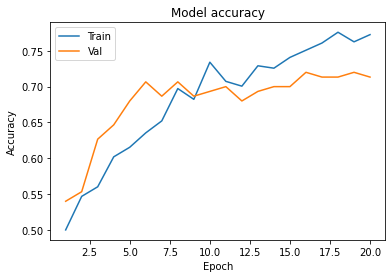

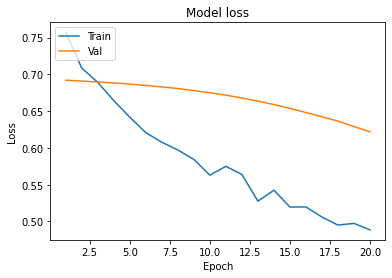

In [85]:
import matplotlib.pyplot as plt
plot_learningCurve(history, epochs)

In [97]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[55, 18],
       [25, 52]])

In [98]:
from tensorflow.keras.models import load_model

In [99]:
model.save('/content/drive/My Drive/Word2vec(custom experiment)/Spacy_word2vec_sentimental_analysis_cnn.h5')

In [100]:
X_test[0].shape

(300, 1)

In [104]:
def get_pred(x, model):
  x = get_clean(x)
  vec = get_vec(x).reshape(1, -1)
  #vec = scaler.transform(vec)
  vec = vec.reshape(1, 300, 1)  
  y_pred = model.predict_classes(vec)
  return y_pred

In [108]:
x = 'it was wonderful movie. thanks for making it'
get_pred(x, model)

array([[1]], dtype=int32)

In [111]:
x = 'it was not a good movie '
get_pred(x, model)

array([[0]], dtype=int32)